In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy

Mounted at /content/drive
Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.9/688.9 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526911 sha256=c430414ad99f76d

7 1
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7cae09551f30>, {})
Q_table
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7cae09551f30>, {})
Q_table
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7cae09551f30>, {'None': [0.724616862152799, -7.06, -7.06, -7.06], '[7, -1]': [0.0, 0.0, 0.0, 0.0], '[6, -1]': [0.0, 0.0, 0.0, 0.0], '[7, 0]': [0.0, 0.0, 0.0, 0.37285084734275725], '[6, 0]': [0.0, 0.0, 0.34497031645099147, 0.0]})
Q_table
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7cae09551f30>, {'None': [0.750633978264454, -7.06, -7.06, -7.06], '[7, -1]': [0.0, 0.0, 0.0, 0.0], '[6, -1]': [0.0, 0.0, 0.0, 0.0], '[7, 0]': [0.0, 0.0, 0.0, 0.38859016711048183], '[6, 0]': [0.0, 0.0, 0.36091066164340724, 0.0]})
Q_table
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7cae09551f30>, {'None': [0.7516717436325908, -7.06, -7.06, -7.06], '[7, -1]': [0.0, 0.0, 0.0, 0.0], '[6, -1]': [0.0, 0.0, 0

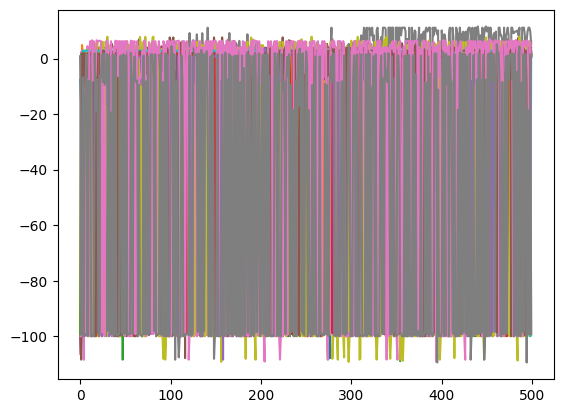

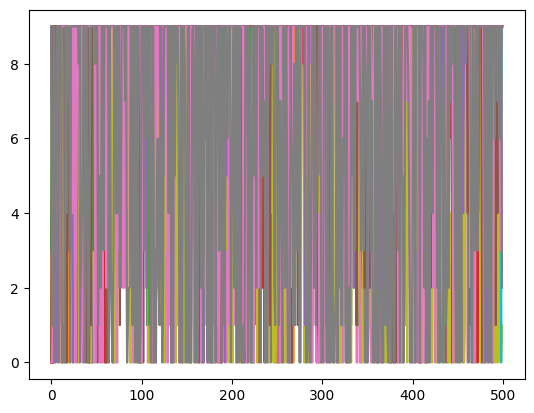

In [2]:
import numpy as np
import random
import pybullet as p
from environment import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory
for qwerty in range(7,9):
  for asdf in range(1,10):
    print(qwerty, asdf)
    global lr
    lr=0.01
    lr=0.0005*2.718281828**((2**-0.5)*qwerty)
    lr=round(lr, 4)
    global df
    df=0.9
    global eps
    eps=0.0005*2.718281828**((2**-0.5)*asdf)
    eps=round(eps, 4)
    global number_of_steps
    number_of_steps = 500

    reward=0



    class QLearningAgent:
        def __init__(self, actions):
            # actions = [0, 1, 2, 3]
            global lr
            global df
            global eps
            self.actions = actions
            self.learning_rate = lr #was 0.01
            self.discount_factor = df #was 0.9
            self.epsilon = eps# was 0.1
            self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
            global qarr
            qarr=self.q_table

        # update q function with sample <s, a, r, s'>
        def learn(self, state, action, reward, next_state):
            current_q = self.q_table[state][action]
            # using Bellman Optimality Equation to update q function
            new_q = reward + self.discount_factor * max(self.q_table[next_state])
            self.q_table[state][action] += self.learning_rate * (new_q - current_q)
            global qarr
            qarr=self.q_table
            #print(self.q_table)

        # get action for the state according to the q function table
        # agent pick action of epsilon-greedy policy
        def get_action(self, state):
            #self.epsilon=self.epsilon*0.99995
            if np.random.rand() < self.epsilon:
                # take random action
                action = np.random.choice(self.actions)
            else:
                # take action according to the q function table
                state_action = self.q_table[state]
                action = self.arg_max(state_action)
            return action

        @staticmethod
        def arg_max(state_action):
            max_index_list = []
            max_value = state_action[0]
            for index, value in enumerate(state_action):
                if value > max_value:
                    max_index_list.clear()
                    max_value = value
                    max_index_list.append(index)
                elif value == max_value:
                    max_index_list.append(index)
            return random.choice(max_index_list)

        def q_table(self):
            print(self.q_table)



    if __name__ == "__main__":
        env = Env()
        agent = QLearningAgent(actions=list(range(env.n_actions)))

        global qarr
        print(qarr)

        episode_plot=[]
        reward_sum_plot=[]
        trial_plot=[]

        for episode in range(number_of_steps):
            state = env.reset()

            if episode%99==0:
                print("Q_table")
                print(qarr)

            #global number_of_steps
            n=10
            for trial in range(n):
                env.render()

                # take action and proceed one step in the environment
                action = agent.get_action(str(state))
                next_state, reward, done, reward_sum = env.step(action)

                # with sample <s,a,r,s'>, agent learns new q function
                agent.learn(str(state), action, reward, str(next_state))

                state = next_state
                #env.print_value_all(agent.q_table)

                if trial==n-1:
                    done=True

                # if episode ends, then break
                if done:

                    #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                    episode_plot=np.concatenate((episode_plot, [episode]))
                    reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                    trial_plot = np.concatenate((trial_plot, [trial]))


                    break





    f=plt.figure(1)
    plt.plot(episode_plot, reward_sum_plot)
    f.show()

    g=plt.figure(2)
    plt.plot(episode_plot, trial_plot)
    g.show()

    data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

    import csv

    # field names
    #fields = ['Episode', 'Reward', 'Trials']

    # data rows of csv file
    rows = data_array

    # name of csv file
    #filename = "university_records.csv"
    filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/RP3_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'
    print(filename)

    # writing to csv file
    with open(filename, 'w') as csvfile:
        # creating a csv writer object
        csvwriter = csv.writer(csvfile)

        # writing the fields
        #csvwriter.writerow(fields)

        # writing the data rows
        csvwriter.writerows(rows)
    #agent.q_table()

  #plt.pause(0)